# Statystyczne metody przetwarzania danych 

## Laboratorium 1 - algorytm Najbliższego Sąsiada (NN)


### Opis

Celem jest zbadanie danych i opracowanie algorytmu klasyfikacji liści. Do tego celu należy zaimplementować i zastosować klasyfikator najbliższego sąsiada - NN (Nearest Neighbor).

### Termin
Zadanie należy wykonać w trakcie trwania laboratorium.

### System oceniania

| Liczba punktów (procentowo) | Ocena |
| :----                    | ---: |
| [0-50)   | 2   |
| [50-60)  | 3   |
| [60-70)  | 3.5 |
| [70-80)  | 4   |
| [80-90)  | 4.5 |
| [90-100] | 5   |

<u>Punkty ujemne</u>

* `ocena - 0.5` jeżeli zadanie wysłano po laboratorium, ale < 7 dni; 
* `ocena - 1` jeżeli zadanie wysłano w terminie pomiędzy 7 a 14 dni;
* `ocena - 1.5` jeżeli zadanie wysłano po upływie 14 dni, ale przed ostatnim laboratorium;
* `ocena = 2` jeżeli zadanie wysłano po ostatnim laboratorium.

<u>Uwaga:</u>

Niedopuszczalne jest dzielenie się notatnikiem (plik `.ipynb`) z innymi studentami ani udostępnianie go w Internecie. Każdy student powinien pobrać notatnik samodzielnie z platformy WIKAMP.
Wysyłając zadanie potwierdasz, że wykonałeś je samodzielnie i jest to Twoja indywidualna praca a materiał przedstawiony w tej pracy jest dla Ciebie zrozumiały. Prace bardzo podobne albo grupowe będą uznawane za plagiat.


### Zbiór danych

Zbiór danych znajduje się w katalogu `dataset/*`. Jest to zmodyfikowany zbiór danych znajdujący się pod adresem: <https://archive.ics.uci.edu/ml/datasets/leaf>.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE.NAZWISKO].zip
    +-- 📜 Lab01.ipynb
    +-- 📂 dataset
        +-- 📜 dataset.npz
        +-- 📜 ReadMe.pdf
```

### Dodatkowe narzędzia

Dopuszczalne jest korzystanie z bibliotek: `numpy`, `pandas`, `matplotlib`.
Implementacja klasyfikatora powinna być wykonana samodzielnie (bez dodatkowych bibliotek).



### Zadanie 1

Wczytaj dane z pliku `dataset.npz`. Plik ten zawiera zbiór danych podzielony na dwa podzbiory: treningowy `train` i testowy `test`. Każdy z nich zawiera cechy oraz indeksy klas. Dokładny opis zbioru danych znajduje się w pliku `ReadMe.pdf`.

> Podpowiedź: Możesz wykorzystać poniższy kod:
```python
with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']
```

In [14]:
# Piotr Klimczak, 1SIiUM2, 239533 / 215275
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']

### Zadanie 2

Sprawdź: 
* ile jest wszystkich próbek z zbiorze, 
* ile jest próbek w poszczegónych klasach.

Czy zauważyłeś jakieś problemy związane z tym zbiorem danych?

In [25]:
"""
df_train
W zbiorze treningowym jest 2244 próbek.

df_test
W zbiorze testowym jest 1496 próbek.

Próbki w poszczególnych klasach:
df_train.groupby('Class (Species)').size().reset_index(name='Ile próbek')
df_test.groupby('Class (Species)').size().reset_index(name='Ile próbek')

.reset_index(name='Ile próbek') - wyświetla w stylu DataFrame

W obu zbiorach brakuje klas pomiędzy 15-22 oraz 36-40. Mniej próbek jest w zbiorze testowym.

"""

columns_name = ['Class (Species)','Specimen Number','Eccentricity','Aspect Ratio','Elongation','Solidity',
                'Stochastic Convexity','Isoperimetric Factor','Maximal Indentation Depth','Lobedness',
                'Average Intensity','Average Contrast','Smoothness','Third moment','Uniformity','Entropy']

df_train = pd.DataFrame(train, columns = columns_name)
df_test = pd.DataFrame(test, columns = columns_name)

df_train
df_test
#ew. można użyć .describe()

df_train_groupby = df_train.groupby('Class (Species)').size().reset_index(name='Ile próbek train')
df_test_groupby = df_test.groupby('Class (Species)').size().reset_index(name='Ile próbek test')

pd.concat([df_train_groupby, df_test_groupby], axis=1)

,Class (Species),Ile próbek train,Class (Species),Ile próbek test
0,1.0,77,1.0,55
1,2.0,66,2.0,44
2,3.0,55,3.0,55
3,4.0,66,4.0,22
4,5.0,77,5.0,55
5,6.0,44,6.0,44
6,7.0,44,7.0,66
7,8.0,33,8.0,88
8,9.0,121,9.0,33
9,10.0,88,10.0,55


### Zadanie 3

Wybierz obserwacje należące do poniższych klas (rodzaje liści):
* `Populus nigra` - klasa nr 3, 
* `Quercus robur` - klasa nr 5.


In [16]:
#lub użyć .isin([3]) zamiast == 3.0
nigra = df_train.loc[df_train['Class (Species)'] == 3.0] 
robur = df_train.loc[df_train['Class (Species)'] == 5.0]

#nigra.describe() #55 próbek
#robur.describe() #77 próbek

#132 total train
#110 total test

#nigra
#robur


### Zadanie 4

A) Wybierz dwie dowolne cechy (*features*).<br />
B) Przedstaw graficznie próbki - na osi X i Y wartości wybranych wyżej cech.

Poniższy kod importuje kolekcję funkcji przydatnych do wizualizacji z biblioteki `matplotlib` (*info: zwróć uwagę, że nadano alias `plt`*).

```python
import matplotlib.pyplot as plt
```

Możesz wykorzystać funkcje `plt.figure`, `plt.scatter`, `plt.legend`, `plt.title`, `plt.xlabel` i `plt.ylabel` w celu wykonania tego zadania.

* Scatter: <https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html>
* Pyplot: <https://matplotlib.org/tutorials/introductory/pyplot.html>

>Ważne: Pamiętaj, że każdy przedstawiony wykres powinien być czytelny i posiadać następujące elementy:
* tytuł,
* opisy wszystkich osi,
* legendę.

> **Przykład**:
```python
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.title("Próbki")
plt.xlabel(f"Cecha 1")
plt.ylabel(f"Cecha 2")
samples = np.random.rand(2, 20, 2)
samples[0] = samples[0]-0.5
samples[1] = samples[1]+0.5
for idx, sample in enumerate(samples):
    plt.scatter(x=sample[:, 0], y=sample[:, 1], label=idx)
plt.legend()
```
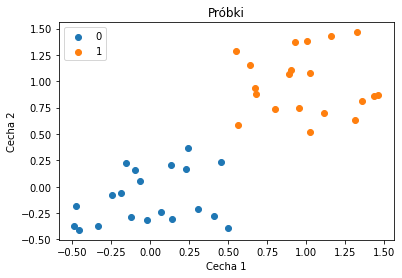


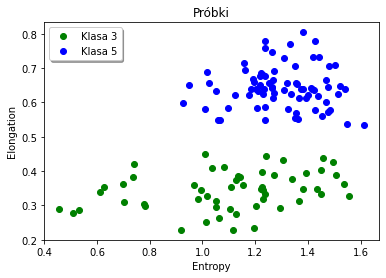

In [17]:
plt.figure()
plt.title("Próbki")
plt.xlabel(f"Entropy")
plt.ylabel(f"Elongation")

#.to_numpy() - Convert the DataFrame to a NumPy array.
nigra_cecha1 = nigra[['Entropy']].to_numpy() 
nigra_cecha2 = nigra[['Elongation']].to_numpy()

robur_cecha1 = robur[['Entropy']].to_numpy()
robur_cecha2 = robur[['Elongation']].to_numpy()

plt.plot(nigra_cecha1,nigra_cecha2,"og",label='Klasa 3') 
plt.plot(robur_cecha1,robur_cecha2,"ob",label='Klasa 5') 
legend = plt.legend(loc='best', shadow=True, fontsize='medium')
plt.show()


### Zadanie 5

Zaimplementuj klasyfikator najbliższego sąsiada NN i uruchom predykcję na zbiorze testowym.

> Podpowiedź: Dla każdej obserwacji ze zbioru `test` należy odnaleźć najbliższego sąsiada w zbiorze `train` i zaklasyfikować obserwację do klasy najbliższego sąsiada.


In [1]:
#loc[0]    # value at index label 0 - nazwane '0'
#iloc[0]   # value at index location 0 - czyli pierwszy element
#isin zwraca True, jeżeli znajduje się np. w Class (Species) wartość 3 lub 5

#normalized_v = v / np.sqrt(np.sum(v**2))
#data - np.min(data)) / (np.max(data) - np.min(data)

nn_train = df_train.loc[df_train['Class (Species)'].isin([3,5])] #wybierz klase 3.0 i 5.0
nn_train_length = len(nn_train) #ile wierszy
nn_train_norm2 = nn_train[['Entropy','Elongation']] #tablica z x,y
print(nn_train_norm2.to_numpy())
#nn_train_norm = nn_train_norm / np.linalg.norm(nn_train_norm, axis=0) #normalizacja 
nn_train_norm = np.min(nn_train_norm2) / (np.max(nn_train_norm2) - np.min(nn_train_norm2))
#nn_train_norm = nn_train_norm2 / np.sqrt(np.sum(nn_train_norm2**2))


nn_train_klasyfikacja = nn_train['Class (Species)']

nn_test = df_test.loc[df_test['Class (Species)'].isin([3,5])] #wybierz klase 3.0 i 5.0
nn_test_length = len(nn_test) #ile wierszy
nn_test_norm2 = nn_test[['Entropy','Elongation']] #tablica z x,y
#nn_test_norm = nn_test_norm / np.linalg.norm(nn_test_norm, axis=0) #normalizacja 
#nn_test_norm = nn_test_norm2 / np.sqrt(np.sum(nn_test_norm2**2))
nn_test_norm = np.min(nn_test_norm2) / (np.max(nn_test_norm2) - np.min(nn_test_norm2))


wzor = np.empty([nn_train_length,1]) #wiersze, kolumny
wynik = np.empty([nn_test_length,1]) 
klasyfikacja = np.empty([nn_test_length,1])

#132 total train
#110 total test

for i in range(nn_test_length): #w zakresie TEST
    for j in range(nn_train_length): #w zakresie TRAIN
        wzor[j,0] = (((nn_test_norm.iloc[i,0] - nn_train_norm.iloc[j,0]) ** 2) + ((nn_test_norm.iloc[i,1] - nn_train_norm.iloc[j,1]) ** 2)) ** 0.5
        #oblicz wzór, zapisujac wynik do kolejnych wierszy
    #############################################################
    wynik[i,0] = np.argmin(wzor) #znajdz, która probka (indeks) z treningowych ma najmniejsza odleglosc (z petli for j...)
    temp = wynik[i,0].astype(int) #zapisz jako int (18.0 -> 18)
    klasyfikacja[i,0] = nn_train_klasyfikacja.iloc[temp] #value at index location [temp], bo tam jest najmniejsza odleglosc

temp2 = nn_test[['Entropy','Elongation']].to_numpy()
zlaczone = np.concatenate((temp2,klasyfikacja),axis=1) #etykietowanie testowych x,y z klasyfikacja, axis=1 - ---> tj. kolumnami

columns_nn = ['x testowe','y testowe','klasyfikacja']
nn_result = pd.DataFrame(zlaczone, columns = columns_nn)
#nn_result


NameError: name 'df_train' is not defined

### Zadanie 6

Wyświetl wyniki klasyfikacji (próbki treningowe i testowe), każda klasa w innym kolorze a próbki testowe innym "markerem".

> Wykorzystaj parametry: `facecolors`, `edgecolors`, `marker` i `c` funkcji `scatter`.

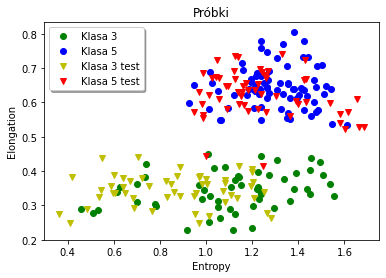

In [19]:
plt.figure()
plt.title("Próbki")
plt.xlabel(f"Entropy")
plt.ylabel(f"Elongation")

nigra_afternn = nn_result.loc[(nn_result['klasyfikacja'] == 3.0)]
nigra_cecha1_afternn = nigra_afternn[['x testowe']].to_numpy()
nigra_cecha2_afternn = nigra_afternn[['y testowe']].to_numpy()

robur_afternn = nn_result.loc[(nn_result['klasyfikacja'] == 5.0)]
robur_cecha1_afternn = robur_afternn[['x testowe']].to_numpy()
robur_cecha2_afternn = robur_afternn[['y testowe']].to_numpy()

plt.plot(nigra_cecha1,nigra_cecha2,"og",label='Klasa 3') 
plt.plot(robur_cecha1,robur_cecha2,"ob",label='Klasa 5') 
plt.plot(nigra_cecha1_afternn,nigra_cecha2_afternn,"yv",label='Klasa 3 test') 
plt.plot(robur_cecha1_afternn,robur_cecha2_afternn,"rv",label='Klasa 5 test') 
legend = plt.legend(loc='best', shadow=True, fontsize='medium')
plt.show()

### Zadanie 7

Oblicz dokładność (*Accuracy*) klasyfikacji (stosunek poprawnie zaklasyfikowanych próbek do liczby wszystkich próbek wyrażony procentowo).

$$
\texttt{Accuracy} = \frac{T}{N}
$$

gdzie $T$ - liczba poprawnie zaklasyfikowanych próbek, $N$ - liczba wszystkich próbek.


In [7]:
zgodne = 0 #init & czysc zmienna

for i in range(nn_test_length):
    if ((nn_test['Class (Species)'].to_numpy())[i]  == (nn_result['klasyfikacja'].to_numpy())[i]): #czy pokrywa się klasyfikacja
        zgodne += 1 #jeżeli tak, +1
        
acc = zgodne / nn_test_length
print(acc*100,'%')

98.18181818181819 %


### Zadanie 8

Wybierz 5 dowolnych rodzajów liści (klasy) i przeprowadź eksperyment ponownie.

> Możesz połączyć wszystkie powyższe fragmenty kodu w wkleić w komórkę poniżej zmieniając liczbę klas.

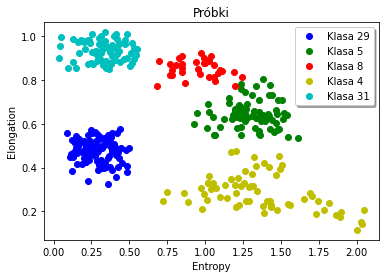

In [8]:
wszystkie = df_train.loc[(df_train['Class (Species)'].isin([29,5,8,4,31]))]

###########################################

plt.figure()
plt.title("Próbki")
plt.xlabel(f"Entropy")
plt.ylabel(f"Elongation")

kl29 = wszystkie.loc[df_train['Class (Species)'] == 29.0] 
kl29_cecha1 = kl29[['Entropy']].to_numpy() 
kl29_cecha2 = kl29[['Elongation']].to_numpy()

kl5 = wszystkie.loc[df_train['Class (Species)'] == 5.0] 
kl5_cecha1 = kl5[['Entropy']].to_numpy() 
kl5_cecha2 = kl5[['Elongation']].to_numpy()

kl8 = wszystkie.loc[df_train['Class (Species)'] == 8.0] 
kl8_cecha1 = kl8[['Entropy']].to_numpy() 
kl8_cecha2 = kl8[['Elongation']].to_numpy()

kl4 = wszystkie.loc[df_train['Class (Species)'] == 4.0] 
kl4_cecha1 = kl4[['Entropy']].to_numpy()
kl4_cecha2 = kl4[['Elongation']].to_numpy()

kl31 = wszystkie.loc[df_train['Class (Species)'] == 31.0] 
kl31_cecha1 = kl31[['Entropy']].to_numpy() 
kl31_cecha2 = kl31[['Elongation']].to_numpy()

plt.plot(kl29_cecha1,kl29_cecha2,"ob",label='Klasa 29') 
plt.plot(kl5_cecha1,kl5_cecha2,"og",label='Klasa 5') 
plt.plot(kl8_cecha1,kl8_cecha2,"or",label='Klasa 8') 
plt.plot(kl4_cecha1,kl4_cecha2,"oy",label='Klasa 4')  
plt.plot(kl31_cecha1,kl31_cecha2,"oc",label='Klasa 31') 

legend = plt.legend(loc='best', shadow=True, fontsize='medium')
plt.show()

In [9]:
nn_train = df_train.loc[df_train['Class (Species)'].isin([29,5,8,4,31])] 
nn_train_length = len(nn_train) #ile wierszy
nn_train_norm = nn_train[['Entropy','Elongation']] #tablica z x,y
nn_train_norm = nn_train_norm / np.linalg.norm(nn_train_norm, axis=0) #normalizacja 

nn_train_klasyfikacja = nn_train['Class (Species)']

nn_test = df_test.loc[df_test['Class (Species)'].isin([29,5,8,4,31])] 
nn_test_length = len(nn_test) #ile wierszy
nn_test_norm = nn_test[['Entropy','Elongation']] #tablica z x,y
nn_test_norm = nn_test_norm / np.linalg.norm(nn_test_norm, axis=0) #normalizacja 

wzor = np.empty([nn_train_length,1]) #wiersze, kolumny
wynik = np.empty([nn_test_length,1]) 
klasyfikacja = np.empty([nn_test_length,1])

#132 total train
#110 total test

for i in range(nn_test_length): #w zakresie TEST
    for j in range(nn_train_length): #w zakresie TRAIN
        wzor[j,0] = (((nn_test_norm.iloc[i,0] - nn_train_norm.iloc[j,0]) ** 2) + ((nn_test_norm.iloc[i,1] - nn_train_norm.iloc[j,1]) ** 2)) ** 0.5
        #oblicz wzór, zapisujac wynik do kolejnych wierszy
    #############################################################
    wynik[i,0] = np.argmin(wzor) #znajdz, która probka (indeks) z treningowych ma najmniejsza odleglosc (z petli for j...)
    temp = wynik[i,0].astype(int) #zapisz jako int (18.0 -> 18)
    klasyfikacja[i,0] = nn_train_klasyfikacja.iloc[temp] #value at index location [temp], bo tam jest najmniejsza odleglosc

temp2 = nn_test[['Entropy','Elongation']].to_numpy()
zlaczone = np.concatenate((temp2,klasyfikacja),axis=1) #etykietowanie testowych x,y z klasyfikacja

columns_nn = ['x testowe','y testowe','klasyfikacja']
nn_result = pd.DataFrame(zlaczone, columns = columns_nn)
nn_result

,x testowe,y testowe,klasyfikacja
0,0.489920,0.904440,31.0
1,0.419280,0.913970,31.0
2,0.410540,0.912330,31.0
3,0.648390,0.838840,8.0
4,0.876870,0.388040,4.0
...,...,...,...
226,1.180374,0.575877,5.0
227,0.430319,0.396981,29.0
228,1.154504,0.792364,5.0
229,1.171063,0.833973,5.0


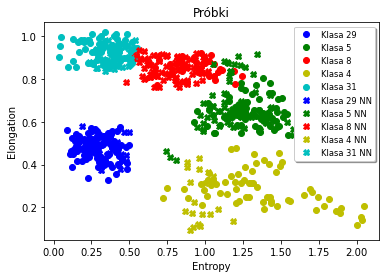

In [10]:
plt.figure()
plt.title("Próbki")
plt.xlabel(f"Entropy")
plt.ylabel(f"Elongation")

kl29_afternn = nn_result.loc[(nn_result['klasyfikacja'] == 29.0)]
kl29_cecha1_afternn = kl29_afternn[['x testowe']].to_numpy()
kl29_cecha2_afternn = kl29_afternn[['y testowe']].to_numpy()

kl5_afternn = nn_result.loc[(nn_result['klasyfikacja'] == 5.0)]
kl5_cecha1_afternn = kl5_afternn[['x testowe']].to_numpy()
kl5_cecha2_afternn = kl5_afternn[['y testowe']].to_numpy()

kl8_afternn = nn_result.loc[(nn_result['klasyfikacja'] == 8.0)]
kl8_cecha1_afternn = kl8_afternn[['x testowe']].to_numpy()
kl8_cecha2_afternn = kl8_afternn[['y testowe']].to_numpy()

kl4_afternn = nn_result.loc[(nn_result['klasyfikacja'] == 4.0)]
kl4_cecha1_afternn = kl4_afternn[['x testowe']].to_numpy()
kl4_cecha2_afternn = kl4_afternn[['y testowe']].to_numpy()

kl31_afternn = nn_result.loc[(nn_result['klasyfikacja'] == 31.0)]
kl31_cecha1_afternn = kl31_afternn[['x testowe']].to_numpy()
kl31_cecha2_afternn = kl31_afternn[['y testowe']].to_numpy()

plt.plot(kl29_cecha1,kl29_cecha2,"ob",label='Klasa 29') 
plt.plot(kl5_cecha1,kl5_cecha2,"og",label='Klasa 5') 
plt.plot(kl8_cecha1,kl8_cecha2,"or",label='Klasa 8') 
plt.plot(kl4_cecha1,kl4_cecha2,"oy",label='Klasa 4')  
plt.plot(kl31_cecha1,kl31_cecha2,"oc",label='Klasa 31') 

plt.plot(kl29_cecha1_afternn,kl29_cecha2_afternn,"Xb",label='Klasa 29 NN') 
plt.plot(kl5_cecha1_afternn,kl5_cecha2_afternn,"Xg",label='Klasa 5 NN') 
plt.plot(kl8_cecha1_afternn,kl8_cecha2_afternn,"Xr",label='Klasa 8 NN') 
plt.plot(kl4_cecha1_afternn,kl4_cecha2_afternn,"Xy",label='Klasa 4 NN')  
plt.plot(kl31_cecha1_afternn,kl31_cecha2_afternn,"Xc",label='Klasa 31 NN') 

legend = plt.legend(loc='best', shadow=True, fontsize='small')
plt.show()

In [11]:
zgodne = 0 #init & czysc zmienna

for i in range(nn_test_length):
    if ((nn_test['Class (Species)'].to_numpy())[i]  == (nn_result['klasyfikacja'].to_numpy())[i]): #czy pokrywa się klasyfikacja
        zgodne += 1 #jeżeli tak, +1

acc = zgodne / nn_test_length
print(acc*100,'%')

88.31168831168831 %


### Zadanie 9

Przeprowadź eksperyment ponownie dla większej liczby cech.

In [12]:
# Matplotlib zostanie pominięty - dla 3 cech (3D) można narysować, to np. dla 4D trzeba by zrobić dodatkowy znacznik
# dla 5D jeszcze kolejny itd
# najważniejszym myślę bedzie i tak ocena doładności

# Wykonano dla 3 cech

nn_train = df_train.loc[df_train['Class (Species)'].isin([29,5,8,4,31])] 
nn_train_length = len(nn_train) 
nn_train_norm = nn_train[['Elongation','Entropy','Aspect Ratio','Lobedness','Solidity']] 
nn_train_norm = nn_train_norm / np.linalg.norm(nn_train_norm, axis=0) 

nn_train = nn_train['Class (Species)']

nn_test = df_test.loc[df_test['Class (Species)'].isin([29,5,8,4,31])] 
nn_test_length = len(nn_test)
nn_test_norm = nn_test[['Elongation','Entropy','Aspect Ratio','Lobedness','Solidity']] 
nn_test_norm = nn_test_norm / np.linalg.norm(nn_test_norm, axis=0)

wzor = np.empty([nn_train_length,1]) #wiersze, kolumny
wynik = np.empty([nn_test_length,1]) 
klasyfikacja = np.empty([nn_test_length,1])

#132 total train
#110 total test

for i in range(nn_test_length): #w zakresie TEST
    for j in range(nn_train_length): #w zakresie TRAIN
        wzor[j,0] = (((nn_test_norm.iloc[i,0] - nn_train_norm.iloc[j,0]) ** 2) + ((nn_test_norm.iloc[i,1] - nn_train_norm.iloc[j,1]) ** 2) + ((nn_test_norm.iloc[i,2] - nn_train_norm.iloc[j,2]) ** 2) + ((nn_test_norm.iloc[i,3] - nn_train_norm.iloc[j,3]) ** 2) + ((nn_test_norm.iloc[i,4] - nn_train_norm.iloc[j,4]) ** 2)) ** 0.5
        #oblicz wzór, zapisujac wynik do kolejnych wierszy
        #DLA 5 PARAMETRÓW JEST ZMODYFIKOWANY WZÓR
    #############################################################
    wynik[i,0] = np.argmin(wzor) #znajdz, ktora probka (indeks) z treningowych ma najmniejsza odleglosc (z petli for j...)
    temp = wynik[i,0].astype(int) #zapisz jako int (18.0 -> 18)
    klasyfikacja[i,0] = nn_train.iloc[temp] #które dane (x,y) z zbioru treningowego NAJBARDZIEJ pokrywaja sie z danym testowym x,y

temp2 = nn_test[['Elongation','Entropy','Aspect Ratio','Lobedness','Solidity']].to_numpy()
zlaczone = np.concatenate((temp2,klasyfikacja),axis=1) #etykietowanie testowych x,y z klasyfikacja

columns_nn = ['y','z','a','b','c','klasyfikacja'] #x y a b c to cechy powyzej (testowe)
nn_result = pd.DataFrame(zlaczone, columns = columns_nn)
nn_result

,y,z,a,b,c,klasyfikacja
0,0.904440,0.489920,9.735100,0.079479,0.933460,31.0
1,0.913970,0.419280,9.491200,1.227000,0.849910,31.0
2,0.912330,0.410540,9.691500,0.449460,0.882560,31.0
3,0.838840,0.648390,6.026900,0.113790,0.960270,8.0
4,0.388040,0.876870,1.552900,0.030306,0.955930,4.0
...,...,...,...,...,...,...
226,0.575877,1.180374,1.769592,0.295472,0.893757,5.0
227,0.396981,0.430319,2.003193,0.151578,0.855369,29.0
228,0.792364,1.154504,5.530228,0.308809,0.954742,5.0
229,0.833973,1.171063,6.267034,0.136485,0.993229,8.0


In [13]:
zgodne = 0 #init & czysc zmienna

for i in range(nn_test_length):
    if ((nn_test['Class (Species)'].to_numpy())[i]  == (nn_result['klasyfikacja'].to_numpy())[i]): #czy pokrywa się klasyfikacja
        zgodne += 1 #jeżeli tak, +1

acc = zgodne / nn_test_length
print(acc*100,'%')

97.83549783549783 %


### Zadanie 10

Napisz wnioski z przeprowadzonego eksperymentu.

In [ ]:
'''
WNIOSKI
W zadaniu 2 znajduje się:
- 2244 próbek w zbiorze treningowym,
- 1496 próbek w zbiorze testowym.
W obu zbiorach brakuje klas pomiędzy 15-22 oraz 36-40.

Kolejne zadania:
- udało się wykonać wszystkie polecenia (m.in zbudować "silnik" - dwie pętle for do algorytmu NN)
- dla cech "Entropy", "Elongation" w klasach 3 i 5 dokładność algorytmu to ~98.2%,
- dla cech "Entropy", "Elongation" w klasach 29, 5, 8, 4, 31 dokładność algorytmu to ~88.3% (czyli zmalała),
- dla cech 'Elongation','Entropy','Aspect Ratio','Lobedness','Solidity' w klasach 29, 5, 8, 4, 31 wynosi 97.84%
(urosła w stosunuku do rozwiązania z dwoma cechami).

Dużą rolę odgrywają same próbki (i ich rozmieszczenie). W zadaniu 8, mimo iż (podczas dobierania) wybrano
teoretycznie "dobrze" wyglądające (tj. nie nachodzące się na siebie) próbki, skuteczność potrafiła zmaleć np. do 75%.

Jak widać, algorytm NN poprawnie spełnił swoje działanie i z całkiem dobrą skutecznością (od 88 do 98%) potrafił zakwalifikować
zbiór testowy.
'''